In [61]:
# List any trends that you are interested in finding in the below cells.
# If you open this file, please create the other diagrams missing.

In [62]:
# Dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress

In [63]:
csv_file = "merged_df.csv"
merged_df = pd.read_csv(csv_file)

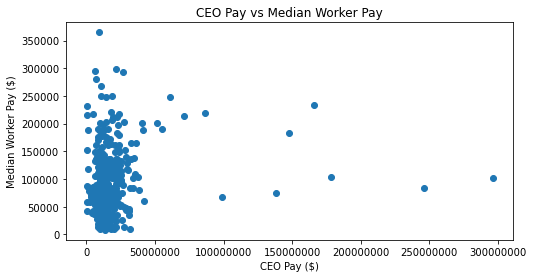

In [64]:
# Trend in Ceo pay vs Median Income

#Taking the dollar and comma symbols out of the numbers before the graph reads them.
x_values = merged_df["CEO Salary"]
y_values = merged_df['Median Worker Pay']

plt.figure(figsize = (8,4))
plt.scatter(x_values,y_values)
plt.xlabel("CEO Pay ($)")
plt.ylabel("Median Worker Pay ($)")
plt.title("CEO Pay vs Median Worker Pay")
#plt.xticks(rotation=90)
# Change x axis labels to plain numbers, other option is "scientific"
plt.ticklabel_format(axis='x',style='plain')

# Save the figure
#plt.savefig(r"E:/Downloads/Group6_proj1/Visuals/CEOoutrageous.png")

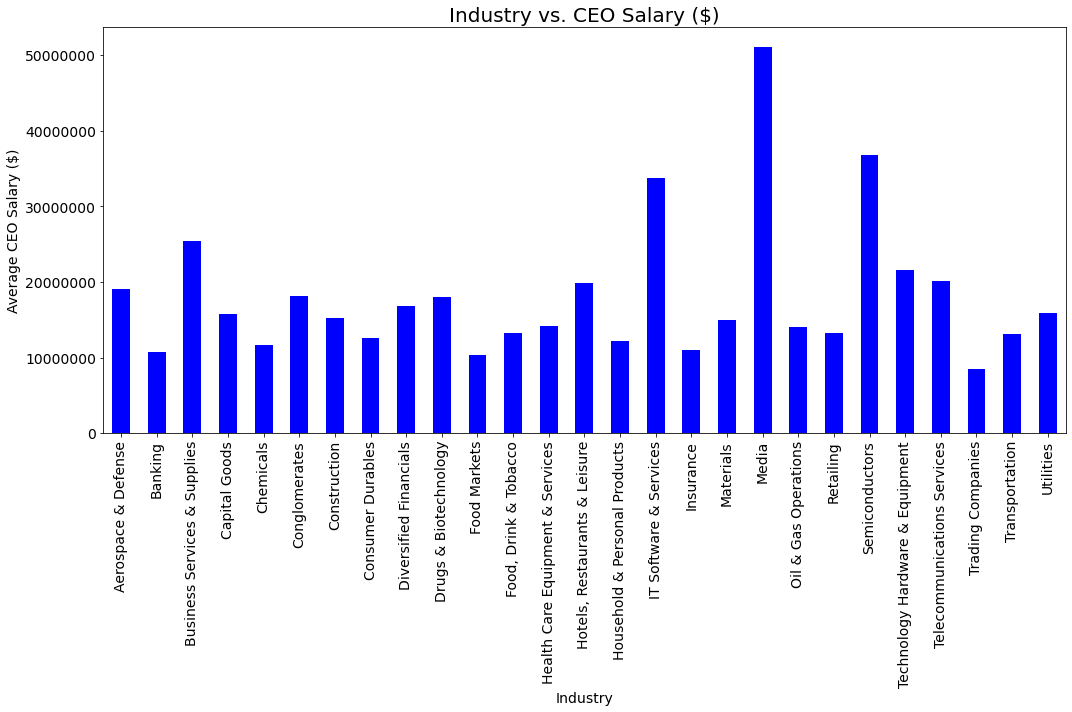

In [65]:
# Group ceo_df by Industry. Compare median or mean CEO pay in categories = industry
# Histogram/bar graph
industry_group = merged_df.groupby(merged_df["Industry"]).mean()["CEO Salary"]
industry_group
plot = industry_group.plot.bar(figsize=(15,10), color='b',fontsize = 14)
plt.xlabel("Industry",fontsize = 14)
plt.ylabel("Average CEO Salary ($)",fontsize = 14)
plt.title("Industry vs. CEO Salary ($)",fontsize = 20)
plt.ticklabel_format(axis='y',style='plain')
plt.tight_layout()
plt.show()

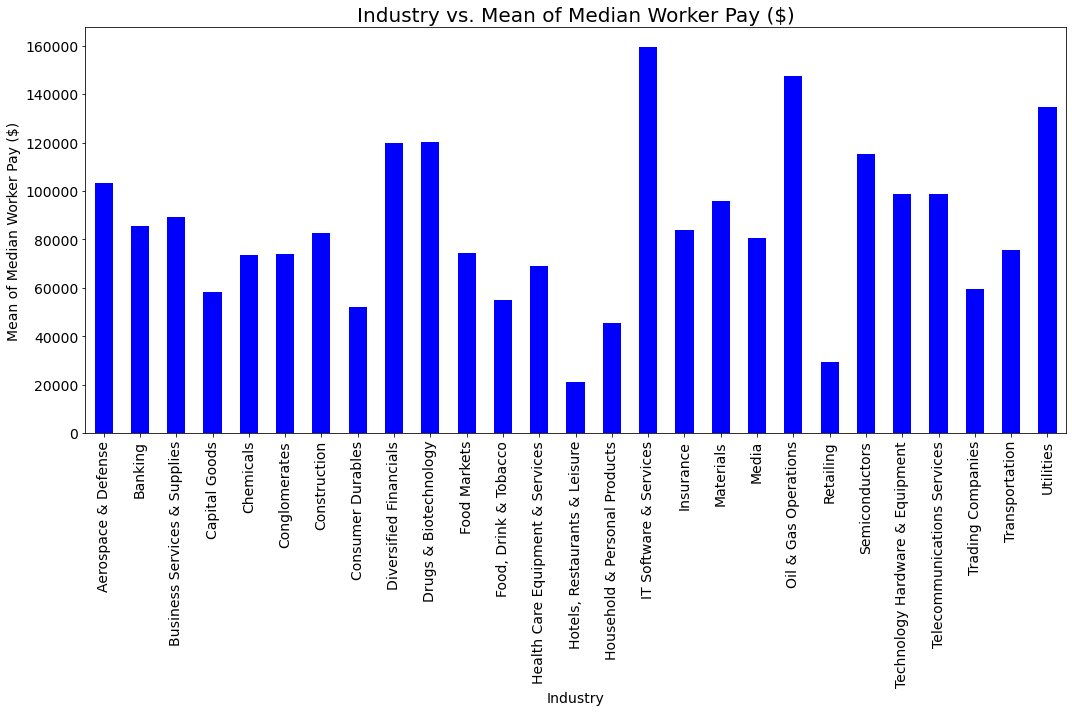

In [66]:
# Group ceo_df by Industry. Compare median or mean median income in categories = industry
# Histogram/bar graph
industry_group = merged_df.groupby(merged_df["Industry"]).mean()["Median Worker Pay"]
industry_group
plot = industry_group.plot.bar(figsize=(15,10), color='b',fontsize = 14)
plt.xlabel("Industry",fontsize = 14)
plt.ylabel("Mean of Median Worker Pay ($)",fontsize = 14)
plt.title("Industry vs. Mean of Median Worker Pay ($)",fontsize = 20)
plt.ticklabel_format(axis='y',style='plain')
plt.tight_layout()
plt.show()

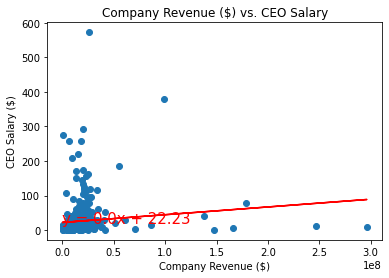

In [69]:
# Trend in Ceo pay (ceo_df) vs Revenue (revenue_df)

def linreg(xval, yval, title, ylab, textcoord):
    (slope, intercept, r_value, p_value, std_err) = linregress(xval, yval)
    regress_values = xval * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(xval,yval)
    plt.plot(xval,regress_values,"r")
    plt.annotate(line_eq, textcoord, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Company Revenue ($)')
    plt.ylabel(ylab)
    plt.show()  
xval = merged_df["CEO Salary"]
yval = merged_df["Revenue (Billions)"]
linreg(xval,yval,"Company Revenue ($) vs. CEO Salary ($)","CEO Salary ($)",(0,20))

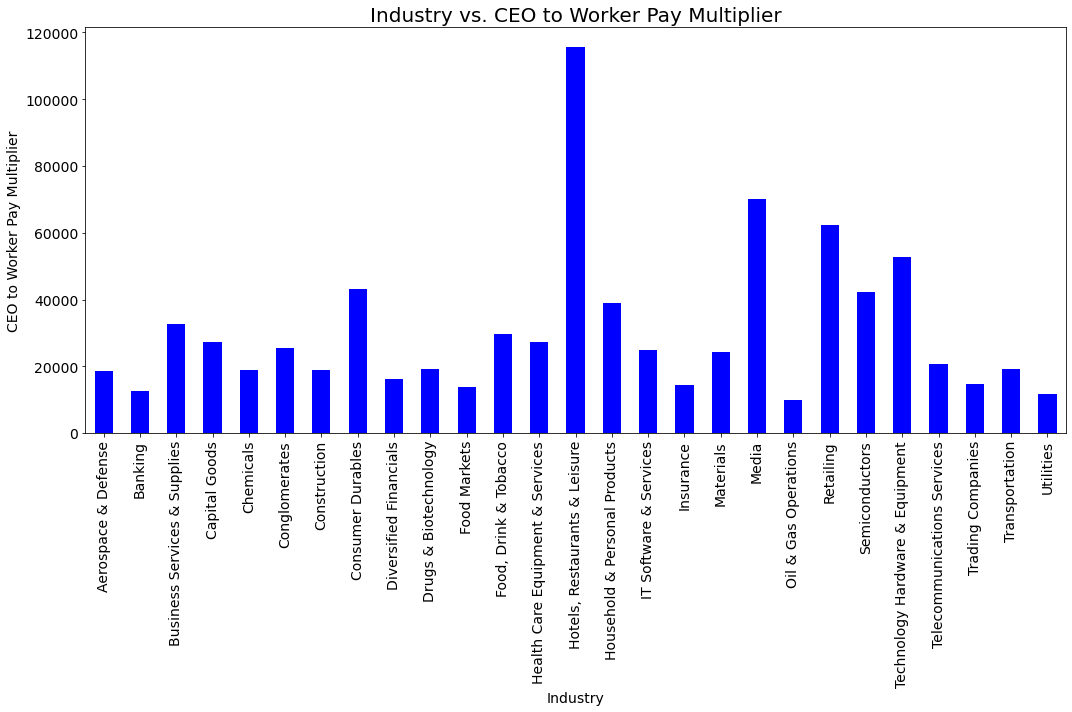

In [70]:
# Group ceo_df by Industry. Compare median or mean median income in categories = industry
# Histogram/bar graph
industry_group = merged_df.groupby(merged_df["Industry"]).mean()["CEO Salary to Worker Pay Multiplier"]
industry_group
plot = industry_group.plot.bar(figsize=(15,10), color='b',fontsize = 14)
plt.xlabel("Industry",fontsize = 14)
plt.ylabel("CEO to Worker Pay Multiplier",fontsize = 14)
plt.title("Industry vs. CEO to Worker Pay Multiplier",fontsize = 20)
plt.ticklabel_format(axis='y',style='plain')
plt.tight_layout()
plt.show()


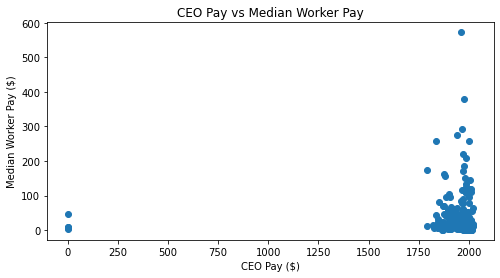

In [71]:
#Year Founded vs. Company Revenue
#Need to change X axis range

x_values = merged_df["Year Founded"]
y_values = merged_df["Revenue (Billions)"]

plt.figure(figsize = (8,4))
plt.scatter(x_values,y_values)
plt.xlabel("CEO Pay ($)")
plt.ylabel("Company Revenue (Billions $)")
plt.title("CEO Pay vs Company Revenue (Billions $)")
#plt.xticks(rotation=90)
# Change x axis labels to plain numbers, other option is "scientific"
plt.ticklabel_format(axis='x',style='plain')
